In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
y = np.expand_dims(y, axis=1)

In [3]:
y.shape, tx.shape

((10000, 1), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    return 1/2*np.mean((y - tx.dot(w))**2)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            w = np.array([[grid_w0[i]], [grid_w1[j]]], dtype=np.float32)
            losses[i][j] = compute_loss(y, tx, w)
                          
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703815952354, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.391 seconds


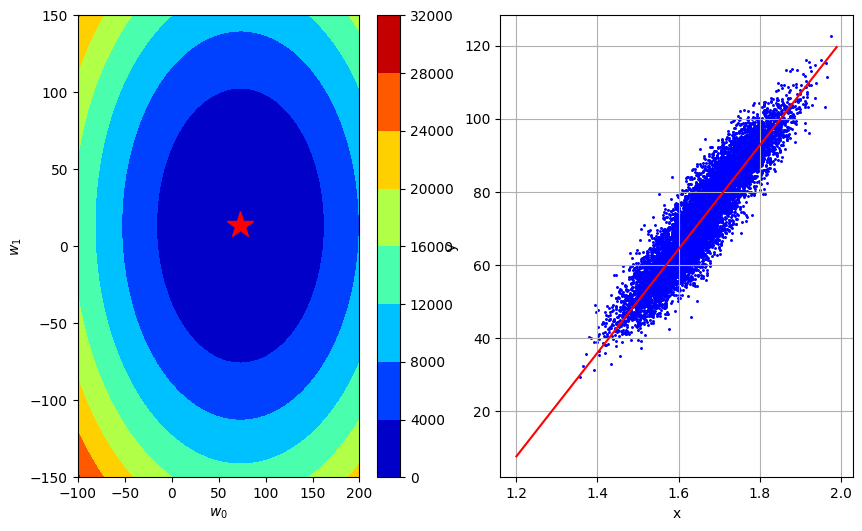

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
#fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    e = y - tx @ w
    return -1/y.shape[0] * (tx.T @ e) 

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        
        w = w - gamma * grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
# 0.001, 0.01, 0.5, 1, 2, 2.5
gamma = 1

# Initialization
w_initial = np.array([[100], [10]])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=378.0473881987588, w0=[73.293922], w1=[13.47971243]
GD iter. 1/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 2/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 3/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 4/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 5/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 6/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 7/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 8/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 9/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 10/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 11/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 12/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
GD iter. 13/49: loss=15.3858878688294, w0=[73.293922], w1=[13.47971243]
G

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):       
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1): 
            grad = np.mean(compute_gradient(minibatch_y, minibatch_tx, w), axis=1)
            w = w - gamma * grad
        
            loss = compute_loss(y, tx, w)
        
            ws.append(w)
            #losses.append(loss)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2261.929020045456, w0=7.723686115656142, w1=3.4536622328592275
SGD iter. 1/49: loss=1821.508877856765, w0=15.344504777643941, w1=8.509311134939887
SGD iter. 2/49: loss=1415.2459674838494, w0=22.284000397084565, w1=4.0006761615619615
SGD iter. 3/49: loss=1161.0312230989719, w0=28.138275878790818, w1=8.3997408481612
SGD iter. 4/49: loss=941.8206585023756, w0=33.42590556314932, w1=9.039256560151433
SGD iter. 5/49: loss=784.9798373222952, w0=37.23478050240807, w1=7.56462595782214
SGD iter. 6/49: loss=679.5401873032769, w0=39.796174607763355, w1=4.950441499882933
SGD iter. 7/49: loss=600.9229043209784, w0=42.18505708688831, w1=4.64864595996331
SGD iter. 8/49: loss=477.40376519624067, w0=46.78573680518107, w1=6.296763048614241
SGD iter. 9/49: loss=470.94015743336433, w0=51.01086173711391, w1=15.260115236322275
SGD iter. 10/49: loss=500.4213046190374, w0=52.30762368292077, w1=18.653242855563153
SGD iter. 11/49: loss=425.74078885238123, w0=54.834639057491785, w1=17.2702642

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [27]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
y = np.expand_dims(y, axis=1)

In [28]:
y.shape, tx.shape

((202, 1), (202, 2))

In [29]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([[0], [0]])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/499: loss=2869.8351145358524, w0=[51.8474641], w1=[7.72442641]
GD iter. 1/499: loss=318.282124701595, w0=[67.40170333], w1=[10.04175433]
GD iter. 2/499: loss=88.6423556165126, w0=[72.0679751], w1=[10.7369527]
GD iter. 3/499: loss=67.97477639885521, w0=[73.46785663], w1=[10.94551222]
GD iter. 4/499: loss=66.11469426926604, w0=[73.88782109], w1=[11.00808007]
GD iter. 5/499: loss=65.94728687760302, w0=[74.01381042], w1=[11.02685043]
GD iter. 6/499: loss=65.93222021235334, w0=[74.05160723], w1=[11.03248153]
GD iter. 7/499: loss=65.93086421248087, w0=[74.06294627], w1=[11.03417087]
GD iter. 8/499: loss=65.93074217249236, w0=[74.06634798], w1=[11.03467767]
GD iter. 9/499: loss=65.93073118889338, w0=[74.06736849], w1=[11.03482971]
GD iter. 10/499: loss=65.93073020036948, w0=[74.06767465], w1=[11.03487532]
GD iter. 11/499: loss=65.93073011140233, w0=[74.06776649], w1=[11.034889]
GD iter. 12/499: loss=65.93073010339529, w0=[74.06779405], w1=[11.03489311]
GD iter. 13/499: loss=65.9307

In [30]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [50]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - tx @ w
    loss = np.mean(np.abs(e))
    grad = -np.dot(tx.T, np.sign(e)) / len(e)
    return loss, grad

In [67]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss, grad = compute_subgradient_mae(y, tx, w)
        
        w = w - gamma * grad
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [76]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([[0], [0]])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=[0.7], w1=[8.7564719e-16]
SubGD iter. 1/499: loss=73.36780585492637, w0=[1.4], w1=[1.75129438e-15]
SubGD iter. 2/499: loss=72.66780585492637, w0=[2.1], w1=[2.62694157e-15]
SubGD iter. 3/499: loss=71.96780585492637, w0=[2.8], w1=[3.50258876e-15]
SubGD iter. 4/499: loss=71.26780585492638, w0=[3.5], w1=[4.37823595e-15]
SubGD iter. 5/499: loss=70.56780585492638, w0=[4.2], w1=[5.25388314e-15]
SubGD iter. 6/499: loss=69.86780585492637, w0=[4.9], w1=[6.12953033e-15]
SubGD iter. 7/499: loss=69.16780585492639, w0=[5.6], w1=[7.00517752e-15]
SubGD iter. 8/499: loss=68.46780585492638, w0=[6.3], w1=[7.88082471e-15]
SubGD iter. 9/499: loss=67.76780585492638, w0=[7.], w1=[8.7564719e-15]
SubGD iter. 10/499: loss=67.06780585492638, w0=[7.7], w1=[9.63211908e-15]
SubGD iter. 11/499: loss=66.36780585492637, w0=[8.4], w1=[1.05077663e-14]
SubGD iter. 12/499: loss=65.66780585492639, w0=[9.1], w1=[1.13834135e-14]
SubGD iter. 13/499: loss=64.96780585492637, w0=[9.8

In [77]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [85]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1): 
            _, grad = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
        
            e = y - tx @ w
            loss = np.mean(np.abs(e))

            ws.append(w)
            losses.append(loss)
            
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [86]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([[0], [0]])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=73.36780585492639, w0=[0.7], w1=[-0.55410707]
SubSGD iter. 1/499: loss=72.66780585492639, w0=[1.4], w1=[-0.83665489]
SubSGD iter. 2/499: loss=71.96780585492638, w0=[2.1], w1=[-0.29569784]
SubSGD iter. 3/499: loss=71.26780585492638, w0=[2.8], w1=[-0.82288648]
SubSGD iter. 4/499: loss=70.56780585492638, w0=[3.5], w1=[0.01830369]
SubSGD iter. 5/499: loss=69.86780585492637, w0=[4.2], w1=[-0.26424413]
SubSGD iter. 6/499: loss=69.16780585492639, w0=[4.9], w1=[-0.48150113]
SubSGD iter. 7/499: loss=68.46780585492638, w0=[5.6], w1=[0.16142856]
SubSGD iter. 8/499: loss=67.76780585492638, w0=[6.3], w1=[-0.67859901]
SubSGD iter. 9/499: loss=67.06780585492638, w0=[7.], w1=[-0.06221206]
SubSGD iter. 10/499: loss=66.36780585492637, w0=[7.7], w1=[-0.09690292]
SubSGD iter. 11/499: loss=65.66780585492639, w0=[8.4], w1=[-0.86772598]
SubSGD iter. 12/499: loss=64.96780585492638, w0=[9.1], w1=[0.03744912]
SubSGD iter. 13/499: loss=64.26780585492638, w0=[9.8], w1=[-0.14601666]
SubSGD

In [87]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>